In [1]:
import numpy as np
import pandas as pd


# Set print options:
# We want to print arrays or dataframes on the full page width in Jupyter Notebook

# Note: the following settings - determined after some trials

# Set some print options for NumPy arrays:

np.set_printoptions(edgeitems=60,    # Number of array items at the beginning and end of each dimension
                    linewidth=600,   # Number of characters per line 
                    precision=3)     # Number of digits for floating point numbers


# Set some print options for Pandas DataFrames:

pd.set_option('display.max_rows', 100)    # Maximum no. of DataFrame rows
pd.set_option('display.max_columns', 10)  # Maximum no. of DataFrame columns
pd.set_option('display.width', 600)       # Number of characters per line

In [2]:
# from sklearn.datasets import fetch_openml


# mnist = fetch_openml('mnist_784', version=1)  # Check that the MNIST filename on OpenML is mnist_784

# # Once the MNIST dataset is downloaded and fetched as a dictionary, you can save it locally as a numpy array:
# np.save('/home/d001/Curs_IA/datasets/MNIST.npy', mnist)  # to see the path, use terminal to navigate to this
#                                                          # folder (eg. datasets), then issue the pwd command

# Now, you can comment all the lines from this cell. Next time you open the notebook, use only the following cell
# to load the saved MNIST dictionary.

/home/d001/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
%config IPCompleter.greedy=True  #activates Intellisense (and others); press Tab for commands, Shift+Tab for params


mnist = np.load('/home/d001/Curs_IA/datasets/MNIST.npy', allow_pickle='TRUE').item()
                        # allow_pickle: allows loading pickled object arrays stored in npy files. 
                        # item(): converts back the saved array to a dictionary

print(mnist.keys())     # Datasets loaded by sklearn usualy have a dictionary structure 

mnist['data']
# Remember about dictionaries:
# dic = {'Apt.1': 'Popescu', 'Apt.2': "Ionescu"}
# print(dic.keys())
# print(dic.values())
# print(dic.items())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


,pixel1,pixel2,pixel3,pixel4,pixel5,...,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [4]:
# print(mnist['DESCR'])
# print(mnist['url'])
# print(mnist['target'])


# Check to see the object type for 'data' and 'target':

print(type(mnist['target']))  # <class 'pandas.core.series.Series'> --> Pandas Series

print(type(mnist['data']))    # <class 'pandas.core.frame.DataFrame'> --> Pandas DataFrame; Or:

print(isinstance(mnist['data'], pd.DataFrame))  # True

print(mnist['data'])  # The first and last pixels are usually zero (they are close to the sides of the pictures)


# => print some pixels with values different from zero:

print(mnist['data'].loc[350:360, 'pixel350':'pixel359'])  # In Pandas "loc" function, the last index is also
                                                          # included in the selection (eg.: 360 and pixel 359)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
True
       pixel1  pixel2  pixel3  pixel4  pixel5  ...  pixel780  pixel781  pixel782  pixel783  pixel784
0         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...     ...  ...       ...       ...       ...       ...       ...
69995     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69996     0.0     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0
69997     0.

In [3]:
# The MOST IMPORTANT MNIST keys are:

#       mnist['data']   -> DataFrame of all figures (on each row -> pixel intensities of one image)
#       mnist['target'] -> Pandas Series (one column) of labels


# In our ML project, we will use NumPy arrays instead of Pandas objects (ML algoritms like array structures):

X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()  # X: array of images; y: array of targets (labels)


print(X.shape)  # (70000, 784); for eg., X[9] -> the 9-th digit from the set;
                #               each row has the 784 pixels of one image (28x28 pixels/img)

print(y.shape)  # (70000,)

print(y.dtype)  # object type (here, this means "string" type)

# Note: most ML algorithms expect numbers instead of strings => cast y to integer:
y = y.astype(np.uint8)  # here, astype() is a numpy method

print(X[350:361, 349:361])

(70000, 784)
(70000,)
object
[[  0.   0.   3. 146. 251. 250.  52.   0.   0.   0.   0.   0.]
 [  0. 180. 253. 251. 251. 142.   0.   0.   0.   0.   0.   0.]
 [254. 253. 207. 254. 253. 227.  42.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  39. 230. 252. 185.  21.   0.   0.   0.   0.]
 [  0.   0. 102. 253. 252. 102.   0.   0.   0.   0.   0.   0.]
 [ 83. 254. 254. 254. 183.  19.   0.   0.   0.   0.   0.   0.]
 [177. 253. 253. 253. 234.  19.   0.   0.   0.   0.   0.   0.]
 [ 47. 211. 253. 251. 235.  82.   0.   0.   0.   0.   0.   0.]
 [254. 254.  95.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 200. 254.  96.   0.]
 [239. 253. 253. 149.   0.   0.   0.   0.   0.   0.   0.   0.]]


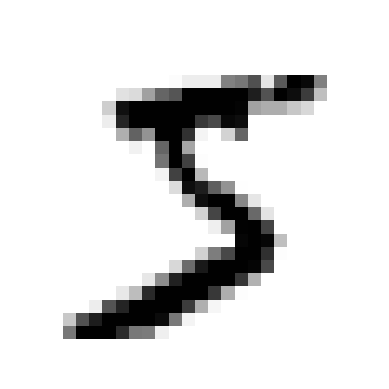

5


In [4]:
# Now, show the picture of one image from X:

import matplotlib.pyplot as plt


some_digit = X[0]  # the handwritten digit that we want to plot
# print(X[0])

some_digit_image = some_digit.reshape(28, 28)  # each image is 28x28 pixels => reshape X[0] (which is 1D)
                                               # to a 2D array

plt.imshow(some_digit_image, cmap='binary')  # prints the first figure (X[0]), using a reversed grayscale colormap
plt.axis('off')  # No coordinate axes
plt.show()

print(y[0])

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(y_train[:40])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


In [6]:
# 1. Prepare the target vectors (labels) for this binary classification:
# ----------------------------------------------------------------------

y_train_5 = (y_train == 5)  # use the mask "y_train_5" -> vector of True (when 5 is found) and False (otherwise)

y_test_5 = (y_test == 5)

print(y_train_5[:15])  # Check to see if the results are good: [True False False False False ...]

print(y_train[:15])    # [5 0 4 1 9 ...]

# Note: this approach will train the classifier to associate images with True (and not with 5) or False.
# So,the classifier will tell us: this image is True, this one is False, the next one is also False, etc.

[ True False False False False False False False False False False  True False False False]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [7]:
# 2. Use Stochastic Gradient Descent as a binary classifier (works with one image at a time):
# -------------------------------------------------------------------------------------------

from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)  # random_state: same random results every time we run
                                                     # this line of code (SGD works randomly)
%time sgd_clf.fit(X_train, y_train_5)                # trains the SGD model

# The above line: a kind of regression, with images from X_train that correspond to True or False (from y_train_5)

CPU times: user 16.7 s, sys: 289 ms, total: 17 s
Wall time: 17 s


SGDClassifier(n_jobs=-1, random_state=42)

In [8]:
# 3. Detect images representing number 5:
# --------------------------------------

result_1 = sgd_clf.predict([X[0]])  # returns True  => the classifier finds out that X[0] is 5;

result_2 = sgd_clf.predict([X[4]])  # returns False => the classifier finds out that X[4] is not 5;

# Instead, only one line of code can be used:
# result = sgd_clf.predict([X[0], X[4]])

print(f"{result_1}; {result_2}")

[ True]; [False]


In [9]:
from sklearn.model_selection import cross_val_score


cls_acc = cross_val_score(sgd_clf,             # the Stochastic Gradient Descent object to be trained
                          X_train,             # training set
                          y_train_5,           # training labels
                          cv=3,                # K (number of subsets)
                          n_jobs=-1,           # Use parallel processing with all CPUs
                          scoring="accuracy")  # returns the accuracy for each fold (also called subset, or split)

print(f"Accuracies for each subset: {cls_acc}")     # array([0.95, 0.96, 0.96])

print(f"Mean accuracy: {cls_acc.mean().round(3)}")  # 0.957

Accuracies for each subset: [0.95 0.96 0.96]
Mean accuracy: 0.957


In [69]:
# How to find the number of instances in a BINARY dataset:
# -------------------------------------------------------

np.count_nonzero(y_train_5)  # 5421;  Counts the number of non-zero values into an array
                             #        https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html
# Or:

# np.sum(y_train_5)          # 5421; True values are considered 1, while False values are considered 0.

# Or:

# np.bincount(y_train_5)  # Returns the CLASS DISTRIBUTION (here, the number of non_5-s and 5-s: 54579, 5421)
#                         # https://numpy.org/doc/stable/reference/generated/numpy.bincount.html


# Total number of instances in the dataset (remember numpy "size"):

# y_train_5.size  # 60000

5421

In [10]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf,   # object to be trained
                                 X_train,
                                 y_train_5,
                                 n_jobs=-1,
                                 cv=3)      # K = 3 - no. of folds (subsets)

In [11]:
print(y_train_pred[:40])  # Returns one prediction (True or False) for each instance of the training set

print(y_train_5[:40])     # Notice that one True value is predicted as False

[ True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False  True False False False False]
[ True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False False False False]


[[53892   687]
 [ 1891  3530]]


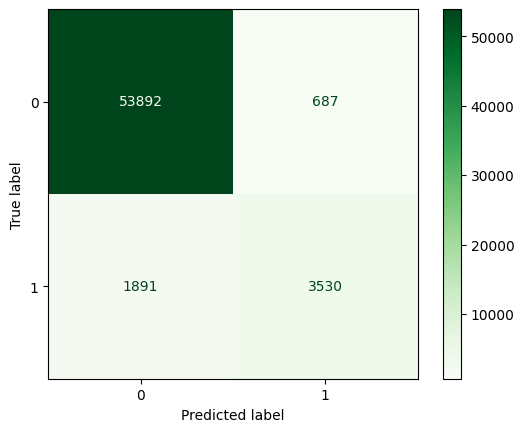

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train_5,     # labels; in SciKit Learn, labels should be the first argument
                      y_train_pred)  # predictions; in SciKit Learn, predictions should be the second argument

print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.show()

# NOTE:
# In Scikit Learn, all metrics functions expect the actual values to be the first argument.
# Otherwise, the actual values will be on columns, and the predicted ones - on rows.

In [14]:
# Compute some of the above metrics:
# ---------------------------------

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Indicii de performanta importati mai sus primesc doi parametri: etichetele si predictiile;
# De exemplu, f1_score(etichete, predictii)


print("Classification Accuracy: ", accuracy_score(y_train_5, y_train_pred).round(3))  # (53892+3530)/60000

print("Precision: ", precision_score(y_train_5, y_train_pred).round(3))               # 3530/(3530+687)
# => When the model claims an image is 5, it is correct only 83.7% of the time!

print("Recall (sensitivity): ", recall_score(y_train_5, y_train_pred).round(3))       # 3530/(3530+1891)
# The model detects only 65.1% of the 5-s!!

print("Specificity: ", (cm[0,0]/(cm[0,0]+cm[0,1])).round(3))                          # 53892/(53892+687)

print("F1 score: ", f1_score(y_train_5, y_train_pred).round(3))

Classification Accuracy:  0.957
Precision:  0.837
Recall (sensitivity):  0.651
Specificity:  0.987
F1 score:  0.733


In [21]:
# Precision/recall trade-off; example for the entire training set

# 1. Compute the decision scores (vector y_scores):

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3,
                             n_jobs=-1,
                             method="decision_function")   # returns decision scores instead of predictions

In [22]:
print(y_scores.round(0))  # Vector of scores, for each of the 60,000 images from the training set

[  1201. -26884. -33072. -15920. -20004. -16653. -14277. -23328.  -5173. -13874. -22113.  -2316. -29304. -18276.  -6791. -16925. -24590. -18278.  -6028. -22382. -49310. -17839. -18791. -17252. -15736. -26565.  -7331. -29867. -55517. -23394. -23749. -38674.  -9727. -31510. -26321.   2128. -17549. -30196. -27894. -12411. -16151. -20215.  -7709. -13619. -11099. -18165. -16223.   7218.  -2050. -19307. -10577. -21488. -30355. -10378. -10628. -23912. -31708. -16706. -24310. -13786. ... -15365. -12943. -11449. -11238. -17140.   5194. -16476.   1153.    752.  -5759. -17479. -16376. -33552. -28398.
 -24017. -10746.   7206.  -3759. -14938. -36505.   2490. -17878.  -9219. -24044. -23182. -32431. -23173. -20817.   9479.   -484. -46038. -43152. -19429. -21419. -34190. -32863. -13898.  -6167. -14191. -19252.  -5285. -17930. -24015. -44123. -27093. -45570. -15746. -22907. -25004. -12758. -23486. -19137.  -8610.   7949. -10904. -22415. -32536.  13272.  -7258. -16878.]


In [25]:

# 2. Based on the above scores (vector y_scores), compute precisions, recalls, and thresholds:


from sklearn.metrics import precision_recall_curve


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)  # returns 3 numpy arrays

print(thresholds.size, '; ', precisions.size)  # returns 60000 and 60001; the next cell explains why sizes
                                               # are different.

# To have a better view on the results, create a DataFrame with these 3 numpy arrays
# (create 3 Pandas Series and concatenate them in a single DataFrame):

s1 = pd.Series(precisions[:-1], name="Precisions")  # see in the next cell why [:-1]

s2 = pd.Series(recalls[:-1], name="Recalls")

s3 = pd.Series(thresholds, name="Thresholds")

df = pd.concat([s1, s2, s3], axis=1)

# Or, create the DataFrame in one line of code, using a dictionary:
# df = pd.DataFrame({"Precisions":precisions[:-1], "Recalls":recalls[:-1], "Thresholds":thresholds})

df.tail(20).round(7)

# Notice that first precisions start at about 9%.

# Experiment with different records from the DataFrame; e.g. print(precision[55000],...) etc.
# or use df.sample(30) instead of df.head(30) or df.tail(30)

60000 ;  60001


,Precisions,Recalls,Thresholds
59980,0.842105,0.002952,30919.239887
59981,0.833333,0.002767,31131.710830
59982,0.823529,0.002583,31196.629751
59983,0.812500,0.002398,31491.567796
59984,0.866667,0.002398,31839.587325
59985,0.857143,0.002214,31847.887269
59986,0.846154,0.002029,32149.324075
59987,0.833333,0.001845,32447.667960
59988,0.818182,0.001660,33498.675602
59989,0.800000,0.001476,33976.830625


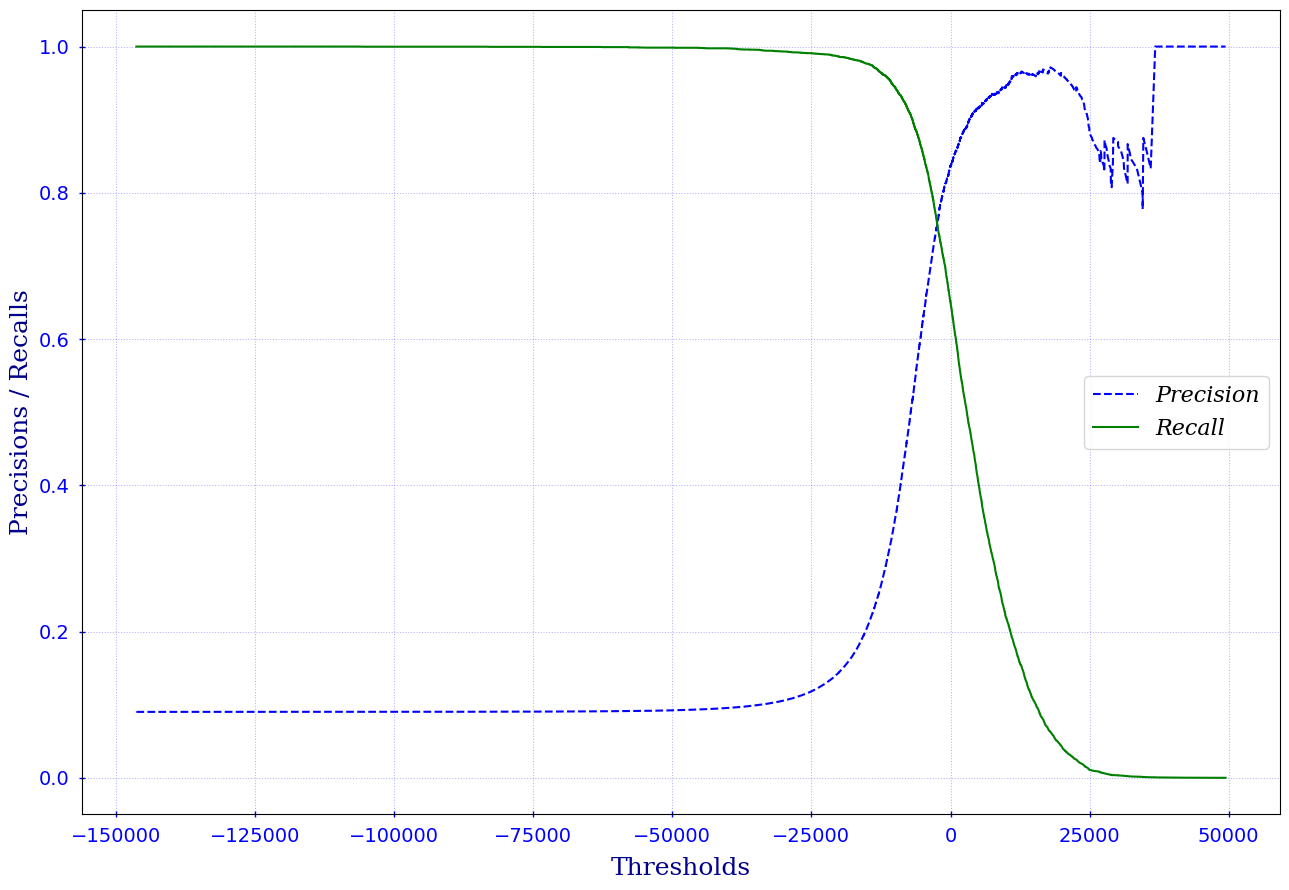

In [34]:
# 3. Plot precision and recall as functions of threshold:

%matplotlib inline
# %matplotlib notebook
# %matplotlib ipympl

import matplotlib.pyplot as plt


# Please pay attention:
# --------------------
# According to official documentation: "The last precision and recall values are 1. and 0. respectively and do not
# have a corresponding threshold. This ensures that the graph starts on the y axis."
# Explicatie:
  # Un barem trebuie sa se afle intre 2 scoruri, cu exceptia primului barem care poate sa nu aiba niciun scor
  # in stanga => dupa ultimul barem trebuie sa mai urmeze un scor (baremul nu poate fi dupa ultimul scor)
  # => thresholds are cu un element mai putin decat numarul de scoruri, deci si decat precisions si recalls
  # => la plotare, pe axa oy se va lua cu un element mai putin (eg. precisions[:-1] omite ultima precizie)


plt.subplots(figsize=(13, 9))

plt.xlabel('Thresholds', labelpad=8, color='darkblue', name='serif', size=18)

plt.ylabel('Precisions / Recalls', color='darkblue', name='serif', size=18)

plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')

plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plt.tick_params(axis="both",   # or 'x', 'y', 'both'
                which='major', # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',     # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)          # Distance from tick to label (in points)

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b', alpha=0.3, linestyle=':', linewidth=0.75)

plt.tight_layout()

plt.legend(loc='center right',
           prop=dict(family='serif',
                     style='italic',
                     size=16)
          )
plt.show()

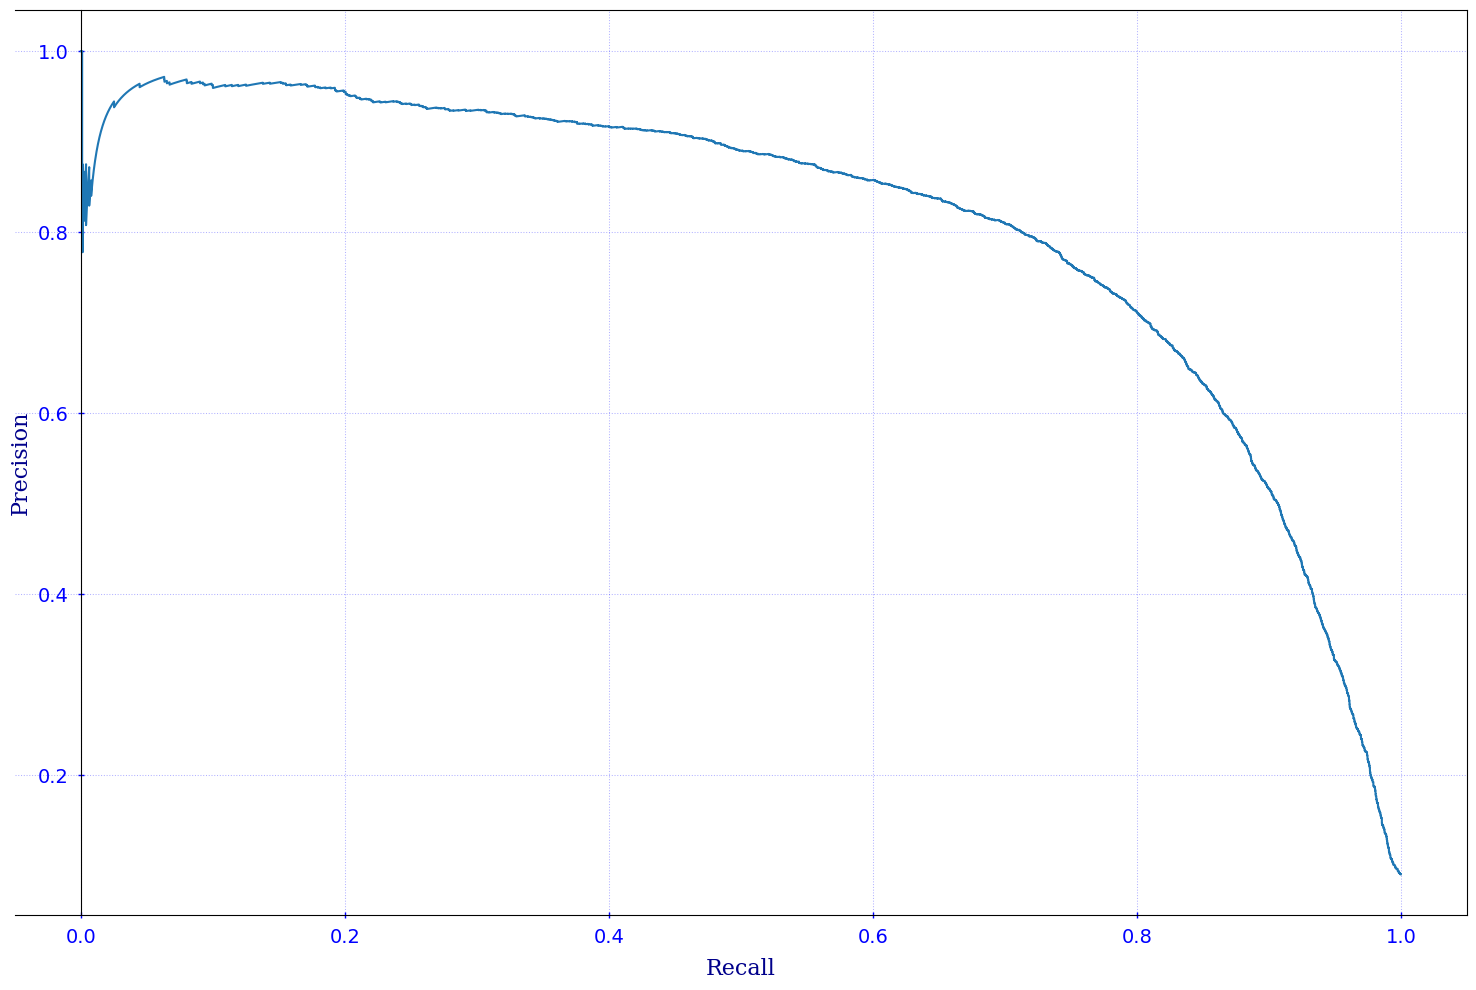

In [35]:
# 3. Another way to visually select a good precision/recall trade-off is to plot
#    precision and recall against each other:

plt.subplots(figsize=(15, 10))

plt.xlabel("Recall", labelpad=8, color='darkblue', name='serif', size=16)

plt.ylabel("Precision", color='darkblue', name='serif', size=16)

plt.plot(recalls, precisions)

plt.tick_params(axis="both",    # or 'x', 'y', 'both'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',     # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)                # Distance from tick to label (in points)


'Place the left and bottom spines to x=0 and y=0, respectively:'

ax = plt.gca()  # gca (get current axes) - returns the current subplot

ax.spines['left'].set_position(('data', 0))    # Alternatively:

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b',
         alpha=0.3,
         linestyle=':',
         linewidth=0.75)

plt.tight_layout()

plt.show()

In [36]:
# 4. Find the first threshold that corresponds to the first precision >= 0.9:

#    4.1. Find the index of the first precision that is >= 0.9

index_prec_90 = np.argmax(precisions>=0.9)                  # 57075: the index of the first precision >= 0.9

print('Index of the 1-st precision >=90: ', index_prec_90)  # 57075

# If you want to see the precision from the above index:
print('The 1-st precision >=90: ', precisions[index_prec_90].round(6))  # 0.900034

# --------------------------------------------------------------------------------------------------------------

#    4.2. Using the above index, find the first threshold that corresponds to the first precision >= 0.9:

threshold_90_precision = thresholds[index_prec_90]

print('Threshold corresponding to the 1-st precision >=90: ', threshold_90_precision.round(5), '\n')  # 3370

# Check the DataFrame to see if, indeed, at index 57075, precision becomes greater than 0.9:

print(df.iloc[57070:57080].round(7))  # "iloc" comes from "index location"

Index of the 1-st precision >=90:  57109
The 1-st precision >=90:  0.900035
Threshold corresponding to the 1-st precision >=90:  3370.0195 

       Precisions   Recalls   Thresholds
57070    0.897270  0.484966  3242.359964
57071    0.897576  0.484966  3242.854385
57072    0.897541  0.484781  3246.466052
57073    0.897848  0.484781  3250.559819
57074    0.898154  0.484781  3251.932056
57075    0.898120  0.484597  3257.875360
57076    0.898085  0.484413  3262.261620
57077    0.898050  0.484228  3267.179928
57078    0.898015  0.484044  3268.528639
57079    0.897980  0.483859  3271.233375


In [37]:
# NOTE: alternatively, points 4.1 and 4.2 from above can be solved using a single line:

threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [38]:
# 5. Based onto the vector of scores (y_scores), create a new vector of True and False: every image with a score
#    lower than threshold_90_precision (which is 3370.019) is False (is not considered to be 5);
#    every image with a score above the threshold_90_precision is True.

# Let's call this vector y_train_pred_90:

y_train_pred_90 = (y_scores >= threshold_90_precision)

print(y_train_pred_90[45:49])  # This range includes a figure representing 5, given a prediction > 90%;
                               # returns [False False True False]

# Short problem:
# Compare the number of predicted True values with the number of True values from the labels vector (y_train_5)
# Clue: you can use the numpy sum() function

[False False  True False]


In [39]:
# 6. Now, that the threshold was set to 90%, re-compute recall and check precision:

rec_score = recall_score(y_train_5, y_train_pred_90)

prec_score = precision_score(y_train_5, y_train_pred_90)

print("Precision_score: ", prec_score)
print("Recall_score: ", rec_score)

Precision_score:  0.9000345901072293
Recall_score:  0.4799852425751706


In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [36]:
precision_score(y_train_5, y_train_pred)

recall_score(y_train_5, y_train_pred)

# f1_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [34]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [35]:
rec_score = recall_score(y_train_5, y_train_pred_90)
prec_score = precision_score(y_train_5, y_train_pred_90)

In [39]:
print(rec_score.round(2))
print(prec_score.round(2))

0.48
0.9


In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)  # FPR = 1 - TNR = 1 - specificity

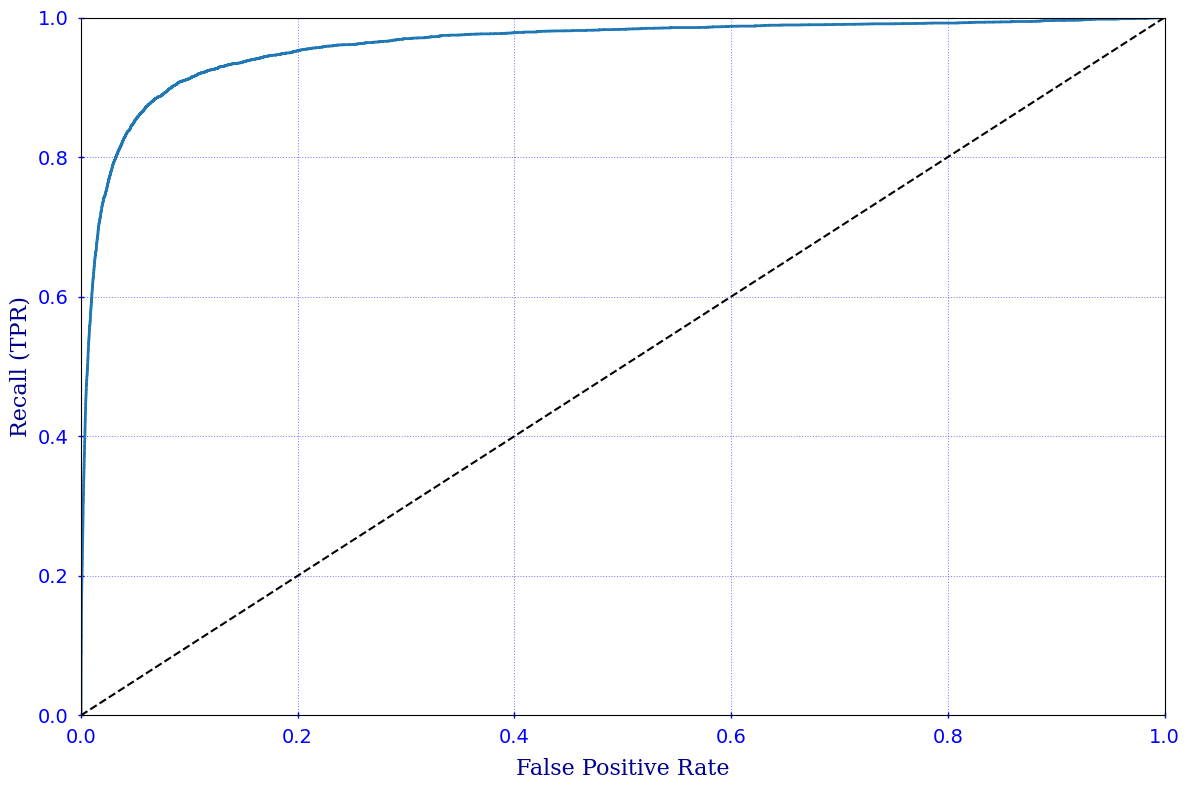

In [41]:

plt.subplots(figsize=(12, 8))     # Define the size of the plot

plt.plot(fpr, tpr, linewidth=2)   # Plt FPR vs. TPR, using a line with width = 2 points

plt.plot([0, 1], [0, 1], 'k--')   # Plot a black, dashed line, from the origin (0, 0) to (1, 1)


# Set the text and font properties for ox and 0y axes:

plt.xlabel("False Positive Rate",labelpad=8, color='darkblue', name='serif', size=16)
plt.ylabel("Recall (TPR)", color='darkblue', name='serif', size=16)


# Set the properties of tick-marks on both axes:

plt.tick_params(axis="both",    # other options besides 'both': 'x', 'y'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='inout',             # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b', labelsize=14,
                pad=7)                         # Distance from tick to label (in points)

plt.axis([0, 1, 0, 1])  # ox and oy axes from 0 to 1

# Place the left spine (oy axis) to x=0 and y=0, respectively:

ax = plt.gca()                                 # gca (get current axes) - returns the current subplot
                                               # (necessary to set the position of the oy axis)

ax.spines['left'].set_position(('data', 0))    # Set the position of oy axis ('left' axis) on (0, 0)
                                               # ('data' to be ploted on ox is FPR and starts from 0)

ax.spines['bottom'].set_position(('data', 0))  # Set the position of ox axis on (0, 0)

plt.grid(which='both',                         # 'both', 'minor', 'major' (default)
         axis='both',                          # 'both', 'x', 'y'
         color='b', alpha=0.5, linestyle=':', linewidth=0.75) # Properties of gridlines

plt.tight_layout()  # Automatically fits the plot within the limits of the figure 
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)  # Create a RandomForestClassifier object

y_probas_forest = cross_val_predict(forest_clf,       # Train the object
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    n_jobs=-1,
                                    method="predict_proba")

print(y_probas_forest[:10, :])  # column 0 - probability that the figure is not 5; column 1 - prob. figure is 5

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]]


In [38]:
y_scores_forest = y_probas_forest[:, 1]  # Select column 1 (contains the probability of each instance to be 5) 

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

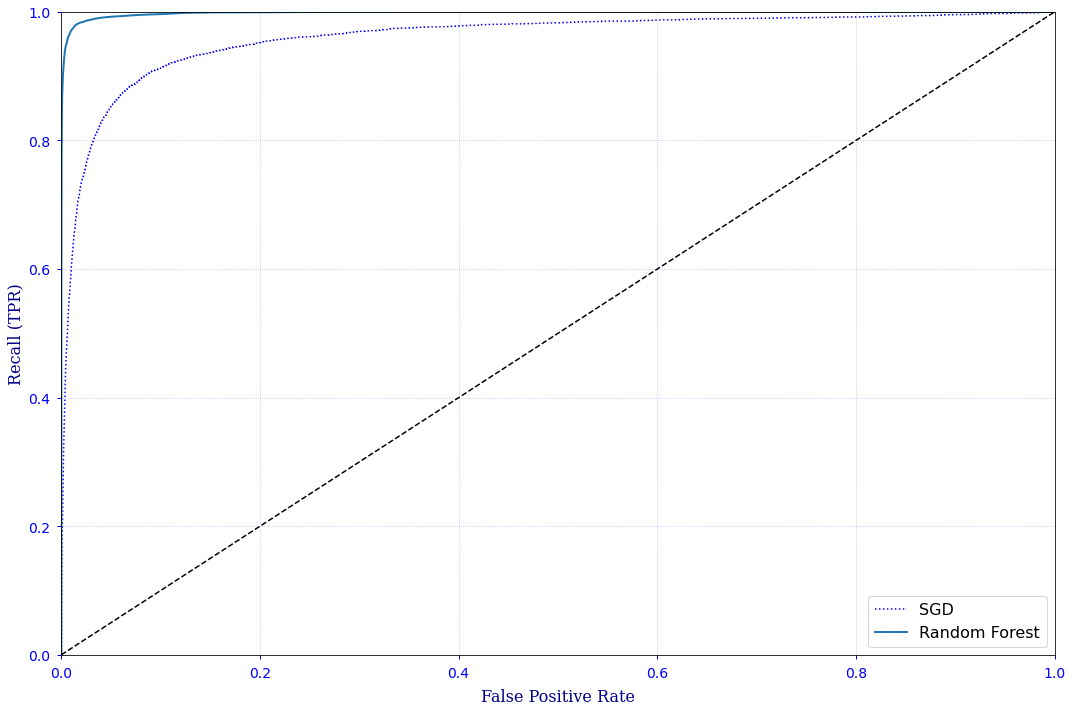

In [39]:
plt.subplots(figsize=(15, 10))

plt.plot(fpr, tpr, "b:", label="SGD")  # ROC curve for the SGDClassifier; "b:" -> blue dotted curve

plt.plot(fpr_forest, tpr_forest,       # ROC curve for the RandomForestClassifier; continuous curve
         linewidth=2,
         label="Random Forest")        # Labels are used for legend

plt.plot([0, 1], [0, 1], "k--")        # ROC Curve for a purely random classifier; "k--" -> black dashed line

plt.xlabel("False Positive Rate",labelpad=8, color='darkblue', name='serif', size=16)

plt.ylabel("Recall (TPR)", color='darkblue', name='serif', size=16)

plt.legend(loc="lower right", fontsize=16)

plt.tick_params(axis="both",    # or 'x', 'y', 'both'
                which='major',  # Which ticks to apply the following settings; options: 'major', 'minor', 'both'
                color='b',
                direction='out',   # Ticks direction: 'in','out', 'inout'
                length=4, width=1,
                labelcolor='b',
                labelsize=14,
                pad=7)             # Distance from tick to label (in points)

plt.axis([0, 1, 0, 1])  # ox and oy axes from 0 to 1

'Place the left and bottom spines to x=0 and y=0, respectively:'
ax = plt.gca()  # gca (get current axes) - returns the current subplot

ax.spines['left'].set_position(('data', 0))

plt.grid(which='both',  # 'both', 'minor', 'major' (default)
         axis='both',   # 'both', 'x', 'y'
         color='b', alpha=0.3, linestyle=':', linewidth=0.75)

plt.tight_layout()
plt.show()

In [40]:
roc_auc_score(y_train_5, y_scores_forest)  # 0.998

0.9983436731328145

In [41]:
# Se calculeaza matricea confuziilor si se evalueaza performanta:

# a) Se creeaza vectorul predictiilor de dimensiunea lui y_probas_forest[:,1]; "True" sunt probabilitatile >= 0.5
#    (se poate considera valoarea 0.5 ca barem!)

threshold = 0.5  # Probabilitatea minima ca imaginea sa se incadreze la True (sa reprezinte cifra 5)

y_train_pred_forest = np.full_like(y_probas_forest[:,1], y_probas_forest[:,1]>=threshold, dtype=bool)

print(y_train_pred_forest)

# -------------------------------------------------------------------------------------------------------------

# b) Se calculeaza matricea confuziilor:

confusion_matrix(y_train_5, y_train_pred_forest)

# -------------------------------------------------------------------------------------------------------------

# c) Se calculeaza precizia, sensibilitatea (recall) si scorul F1:

print()

print("Precision: ", precision_score(y_train_5, y_train_pred_forest).round(4))

print("Recall: ", recall_score(y_train_5, y_train_pred_forest).round(4))

print("F1 score: ", f1_score(y_train_5, y_train_pred_forest).round(4))

[ True False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False  True False False False False False False False False False False False False ... False False False False False  True False  True False False False False False False False False  True False False False  True False False False False False False False  True False False False False False False False False False False
 False False False False False False False False False False False False False False  True False False False  True False False]

Precision:  0.9897
Recall:  0.8725
F1 score:  0.9275


In [42]:

from sklearn.svm import SVC   # SVC - Support Vector Classifier


svm_clf = SVC(random_state=42)

svm_clf.fit(X_train, y_train)   # use y_train, not y_train_5!
                                # Attention: training takes a lot of time! Scikit-Learn automatically selected
                                # the OvO strategy (trained 45 SVC classifiers)

SVC(random_state=42)

In [43]:
print(svm_clf.predict([X[0], X[2]]))  # X[0] was was passed through each of the 45 trained classifiers; 
                                      # => 45 decision scores; the class that "won most duels" was selected
                                      # The same - for X[2]

[5 4]


In [44]:
X_0_score = svm_clf.decision_function([X[0]])

print(X_0_score)  # The highest score corresponds to class 5: 9.313

print("The index of the highest score is", np.argmax(X_0_score))

svm_clf.classes_  # Shows all the target classes from the training set


[[ 1.725  2.728  7.251  8.308 -0.311  9.313  1.71   2.768  6.23   4.848]]
The index of the highest score is 5


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
from sklearn.multiclass import OneVsRestClassifier


# Pass the svm_clf object as an argument to the OneVsRestClassifier class:
ovr_clf = OneVsRestClassifier(svm_clf,
                              n_jobs=-1)  # Attention! Training takes very long without n_jobs (around 20 minutes)!

%time ovr_clf.fit(X_train, y_train)

CPU times: user 520 ms, sys: 397 ms, total: 917 ms
Wall time: 10min 12s


OneVsRestClassifier(estimator=SVC(random_state=42), n_jobs=-1)

In [46]:

for i in range(15):
    print(ovr_clf.predict([X[i]]), ";  ", y_train[i])  # Print both the prediction and the corresponding label
    

[5] ;   5
[0] ;   0
[4] ;   4
[1] ;   1
[9] ;   9
[2] ;   2
[1] ;   1
[3] ;   3
[1] ;   1
[4] ;   4
[3] ;   3
[5] ;   5
[3] ;   3
[6] ;   6
[1] ;   1


In [47]:

sgd_clf.fit(X_train, y_train)  # By default, SkLearn uses the OvR algorithm (10 binary classifiers are trained)
                               # Note: the sgd_clf object was previously defined in cell [9].

SGDClassifier(n_jobs=-1, random_state=42)

In [48]:

print(f'Predicted: {sgd_clf.predict([X[2]])}\nActual: {y_train[2]}\n\n')

scores = sgd_clf.decision_function([X[2]])
    
print(f"Scores: {scores};\n\nIndex of the highest score: {np.argmax(scores)}")


Predicted: [4]
Actual: 4


Scores: [[-34143.407 -21942.138  -4018.293  -2239.193     43.094 -15058.881 -33653.311  -8277.806  -7460.52  -14180.153]];

Index of the highest score: 4


In [49]:

accuracy_3_folds = cross_val_score(sgd_clf,
                                   X_train, y_train,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring="accuracy")  # Takes some time!


In [50]:
print('Accuracy for each fold: ', accuracy_3_folds)

print('Mean accuracy: ', accuracy_3_folds.mean().round(3))

Accuracy for each fold:  [0.874 0.858 0.869]
Mean accuracy:  0.867


In [51]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

accuracy_scaled = cross_val_score(sgd_clf,
                                  X_train_scaled, y_train,
                                  cv=3,
                                  n_jobs=-1,
                                  scoring="accuracy")

In [52]:
print('Accuracy for each fold, after scaling: ', accuracy_scaled)

print('Mean accuracy after scaling: ', accuracy_scaled.mean().round(3))

Accuracy for each fold, after scaling:  [0.898 0.891 0.902]
Mean accuracy after scaling:  0.897


In [53]:
y_train_pred = cross_val_predict(sgd_clf,
                                 X_train_scaled, y_train,
                                 n_jobs=-1,
                                 cv=3)

In [54]:
conf_mx = confusion_matrix(y_train, y_train_pred) 

print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


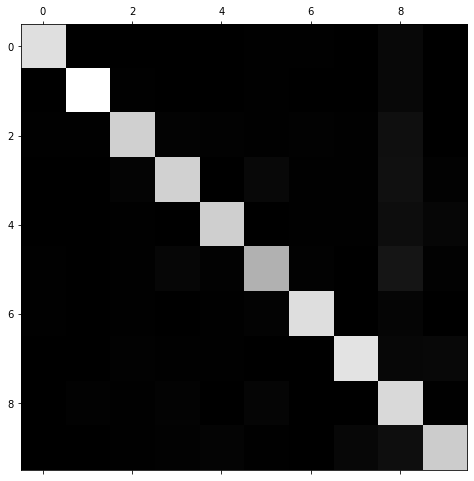

In [55]:
plt.figure(figsize=(8,8))

plt.matshow(conf_mx,           # matshow - displays an array as a figure; 
            fignum=1,          # applies the above established figure size;
            cmap=plt.cm.gray)  # use shades of gray to color the image;
plt.show()

# see matshow official documentation at:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

In [56]:
row_sums = conf_mx.sum(axis=1,
                       keepdims=True)  # keepdims=True: result will be a 2D array instead of a 1D one
print("Number of images in each class:")
print(row_sums)

Number of images in each class:
[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


In [57]:

norm_conf_mx = conf_mx / row_sums  # values in the first row are divided with the no of 0-s,
                                   # values in the second row are divided with the number of 1-s, etc.

print("Normalized confusion matrix:\n")

print(norm_conf_mx.round(3))


Normalized confusion matrix:

[[0.942 0.    0.004 0.001 0.001 0.007 0.006 0.001 0.038 0.   ]
 [0.    0.949 0.005 0.004 0.001 0.007 0.001 0.001 0.031 0.001]
 [0.005 0.005 0.876 0.015 0.012 0.005 0.011 0.006 0.063 0.002]
 [0.004 0.003 0.019 0.853 0.    0.033 0.004 0.007 0.066 0.012]
 [0.002 0.002 0.007 0.002 0.887 0.002 0.006 0.005 0.059 0.028]
 [0.005 0.003 0.006 0.031 0.01  0.82  0.014 0.003 0.099 0.011]
 [0.005 0.003 0.007 0.001 0.007 0.016 0.938 0.001 0.022 0.   ]
 [0.003 0.002 0.008 0.005 0.008 0.002 0.    0.907 0.031 0.034]
 [0.003 0.011 0.008 0.015 0.001 0.022 0.004 0.002 0.928 0.008]
 [0.004 0.003 0.005 0.011 0.02  0.006 0.    0.03  0.062 0.858]]


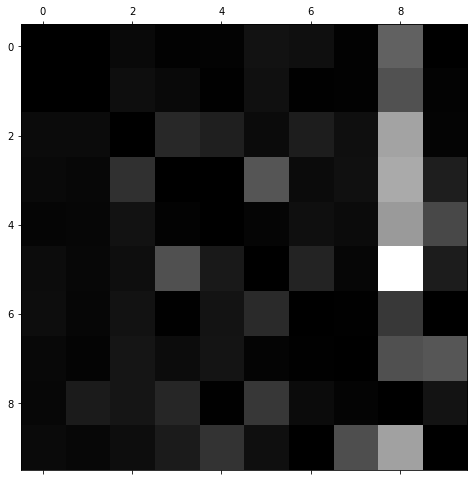

In [58]:
np.fill_diagonal(norm_conf_mx, 0)  # fill diagonal with 0-s

plt.figure(figsize=(8,8))

plt.matshow(norm_conf_mx,
            fignum=1,
            cmap=plt.cm.gray)

plt.show()

In [59]:

import matplotlib


""" Note:
    Suppose you want to plot the first 25 images from X (plot 5 rows of images, with 5 images per row, similar 
    with the above figure). You will call the plot_digits function as follows:

    plot_digits(X[:25], images_per_row=5)
"""


def plot_digits(arr_of_imgs_to_plot, images_per_row=5):
    
    size = 28  # the size of each image is 28 x 28 pixels
    
    # Take each row from arr_of_imgs_to_plot and transform it into a 28x28 array; put all these arrays into a list:
    images = [instance.reshape(size,size) for instance in arr_of_imgs_to_plot]  # each instance (image) is a vector
                                                                                # of 784 pixel intensities; reshape
                                                                                #  it to 28 x 28 pixels.
    n_rows = int((len(arr_of_imgs_to_plot)) / images_per_row)   # Establishes how many rows will have the group
                                                                # of images to be plotted
    # About len(arr_of_imgs_to_plot): if, for example arr_of_imgs_to_plot is X[:25] =>
    # len(X[:25]) returns the number of rows, which is 25 (and this is the number of images to plot).
    
    
    row_images = []  # Initialize an empty list
    
    for row in range(n_rows):
        # Take one row of images at a time from the array "images", and put them onto the "images_from_a_row" list:
        images_from_a_row = images[row * images_per_row : (row + 1) * images_per_row]

        # Concatenate horizontally all images from a row into a single array => shape 28 x 140,
        # because (5 images per row) x (28 columns per image) = 140:
        concatenated_row = np.concatenate(images_from_a_row, axis=1)
        
        # Append the 28x140 array to the "row images" list:
        row_images.append(concatenated_row)


    image = np.concatenate(row_images, axis=0)  # Concatenate all the elements from the "row_images" list
                                                # one below the other, into a single array of shape 140 x 140

    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

[array([[1, 1, 3, 3],
       [2, 2, 4, 4]]), array([[5, 5, 7, 7],
       [6, 6, 8, 8]])]
[[1 1 3 3]
 [2 2 4 4]
 [5 5 7 7]
 [6 6 8 8]]


(-0.5, 3.5, 3.5, -0.5)

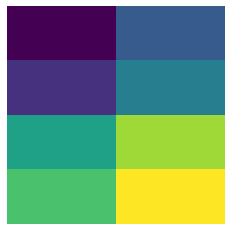

In [62]:
""" This cell can be used as a much simpler example to better understand how the above function is working """

row_images_1 = []

# -------------------------------------------------------------------------

# Suppose row 1 has two images (a and b), each of 2x2 pixels:
a = np.array([[1, 1],
              [2, 2]])  # image 1 from row 1

b = np.array([[3, 3],
              [4, 4]])  # image 2 from row 1

concatenated_row_1 = np.concatenate([a, b], axis=1)    # [[1 1 3 3]
row_images_1.append(concatenated_row_1)                #  [2 2 4 4]]

# -------------------------------------------------------------------------

# Suppose row 2 has also two images (c and d), each of 2x2 pixels:
c = np.array([[5, 5],
              [6, 6]])  # image 1 from row 2
d = np.array([[7, 7],
              [8, 8]])  # image 2 from row 2
concatenated_row_2 = np.concatenate([c, d], axis=1)    # [[5 5 7 7]
row_images_1.append(concatenated_row_2)                #  [6 6 8 8]]

print(row_images_1)  # List of the above 2 arrays:
                                                    # [array([[1, 1, 3, 3],
                                                    #         [2, 2, 4, 4]]), array([[5, 5, 7, 7],
                                                    #                                [6, 6, 8, 8]])]

# -------------------------------------------------------------------------

# Transform the "row_images" list into an array, using np.concatenate:
image_1 = np.concatenate(row_images_1, axis=0)

print(image_1)    # [[1 1 3 3]
                  #  [2 2 4 4]
                  #  [5 5 7 7]
                  #  [6 6 8 8]]

plt.imshow(image_1)#, cmap = matplotlib.cm.binary)
plt.axis("off")

In [63]:
X_33 = X_train[(y_train==3) & (y_train_pred==3)]  # Images from X_train that are corectly identified as 3

X_35 = X_train[(y_train==3) & (y_train_pred==5)]  # Images of 3 from X_train, that are confused with 5

X_55 = X_train[(y_train==5) & (y_train_pred==5)]  # Images from X_train that are corectly identified as 5

X_53 = X_train[(y_train==5) & (y_train_pred==3)]  # Images of 5 from X_train, that are confused with 3


     The following two columns of images are:
Digits classified as 3-s:    Digits classified as 5-s:


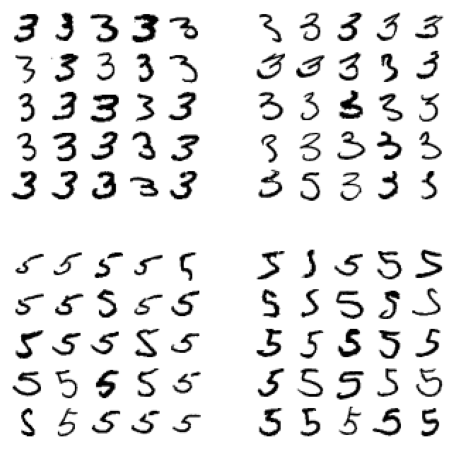

In [64]:
print("\n     The following two columns of images are:")
print("Digits classified as 3-s:    Digits classified as 5-s:")

plt.figure(figsize=(8, 8))

plt.subplot(221)                          # 221: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_33[:25], images_per_row=5)  # this is the first subplot (upper-left group of digits)

plt.subplot(222)                          # 222: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_35[:25], images_per_row=5)  # this is the 2-nd subplot (upper-right group of digits)

plt.subplot(223)                          # 223: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_55[:25], images_per_row=5)  # This is the 3-rd subplot (lower-left group of digits)

plt.subplot(224)                          # 224: The above 4 groups of images are aranged on 2 rows and 2 columns;
plot_digits(X_53[:25], images_per_row=5)  # This is the 4-th subplot (lower-right group of digits)

In [65]:
y_train_large = (y_train >= 7)

y_train_odd = (y_train % 2 == 1)

In [66]:
y_multilabel = np.c_[y_train_large, y_train_odd]  # Concatenate the above 2 vectors to obtain y_multilabel

print(y_multilabel[:20])

[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [ True  True]]


In [67]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_jobs=-1)

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(n_jobs=-1)

In [68]:
# Making a prediction for a single image - X[0] (this is an image of digit 5):
knn_clf.predict([X[0]])  # returns array([[False,  True]])

array([[False,  True]])

In [69]:
y_train_knn_pred = cross_val_predict(knn_clf,
                                     X_train, y_multilabel,
                                     cv=3,
                                     n_jobs=-1)

In [70]:
print(y_train_knn_pred[:20])

[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [ True  True]]


In [71]:

f1_score(y_multilabel,
         y_train_knn_pred,
         average="macro")


0.976410265560605

In [72]:

noise = np.random.randint(0, 100,               # noise: random integer values, between 0 and 100
                          (len(X_train), 784))  # Pay attention: put the matrix dimension in a tuple


In [73]:
X_train_modified = X_train + noise  # This is a training set, consisting of noisy images

y_train_modified = X_train          # Labels will be represented by the original set of clean images
                                    # (one label for each pixel in X_train)

In [74]:
noise = np.random.randint(0, 100, (len(X_test), 784))

X_test_modified = X_test + noise

y_test_modified = X_test


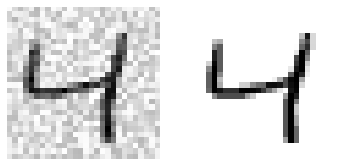

In [84]:
some_noisy_digit = X_train_modified[2]               # Vector of noisy pixels

some_noisy_image = some_noisy_digit.reshape(28, 28)  # Reshape the vector (28 x 28 pixels)

plt.subplot(121)  # plotting space is arranged as a grid of 1 row and 2 columns; the first grid cell was selected

plt.imshow(some_noisy_image, cmap='binary')

plt.axis('off')

# --------------------------------------------

some_clean_digit = y_train_modified[2]                # Vector of pixels with correct intensities

some_clean_image = some_digit.reshape(28, 28)

plt.subplot(122)  # plotting space is arranged as a grid of 1 row and 2 columns; the 2-nd grid cell was selected

plt.imshow(some_clean_image, cmap='binary')

plt.axis('off')

plt.show()

In [76]:

# Train the classifier on the training dataset:

knn_clf.fit(X_train_modified,
            y_train_modified)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
np.set_printoptions(edgeitems=60,    # Number of array items at the beginning and end of each dimension
                    linewidth=600,   # Number of characters per line 
                    precision=3)     # Number of digits for floating point numbers

In [137]:

# Make a prediction on an altered digit from the testing dataseset:
# ----------------------------------------------------------------

# Use the following line of code to see what numbers are at each position in the testing set:
print(y_test)

img_idx = 6  # index of noisy image to be cleaned

cleaned_digit = knn_clf.predict([X_test_modified[img_idx]])  # at index 6 there is an handwritten 4;
                                                             # cleaned_digit is a vector of cleaned pixels

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 ... 6 5 3 3 3 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 5 2 4 9 4 3 6 4 1 7 2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]


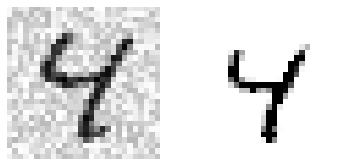

In [138]:
noisy_digit = X_test_modified[img_idx]
noisy_image = noisy_digit.reshape(28, 28)
plt.subplot(121)
plt.imshow(noisy_image, cmap='binary')
plt.axis('off')

# --------------------------------------------

cleaned_image = cleaned_digit.reshape(28, 28)
plt.subplot(122)
plt.imshow(cleaned_image, cmap='binary')
plt.axis('off')
plt.show()

In [79]:

np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
                    suppress=False, threshold=1000, formatter=None)